# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

# visualização

%matplotlib inline

In [2]:
sns.set_style("dark")

In [3]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

visualizacao = train_data

In [4]:
visualizacao.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


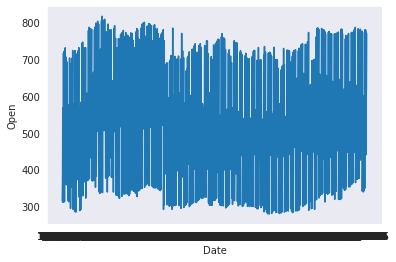

In [5]:
sns.lineplot(x='Date',y='Open',data=visualizacao)

In [6]:
print('Que Deus Perdoe essas pessoas ruins')

Que Deus Perdoe essas pessoas ruins


In [7]:
visualizacao['Date'] = visualizacao['Date'].apply(pd.to_datetime)

In [8]:
visualizacao['ano'] = visualizacao['Date'].apply(lambda x: x.year)
visualizacao['mes'] = visualizacao['Date'].apply(lambda x: x.month)
visualizacao['dia'] = visualizacao['Date'].apply(lambda x: x.day)

In [9]:
visualizacao.head()

,Date,Open,High,Low,Close,Volume,ano,mes,dia
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


In [10]:
visualizacao[['Open','High','Low','Close']].std()

Open    151.904442
High    153.008811
Low     150.552807
dtype: float64

In [11]:
visualizacao[['Open','High','Low','Close']].var()

Open    23074.959474
High    23411.696203
Low     22666.147797
dtype: float64

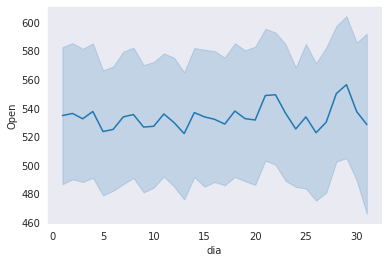

In [12]:
sns.lineplot(x='dia',y='Open', data=visualizacao)

In [14]:
visualizacao.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ano', 'mes', 'dia'], dtype='object')

In [15]:
rolling_60 = visualizacao[['Open','Close','Low','High']].rolling(60, min_periods=1).mean()
rolling_60[['ano', 'mes', 'dia', 'Date']] = visualizacao[['ano', 'mes', 'dia', 'Date']]

/home/victor/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


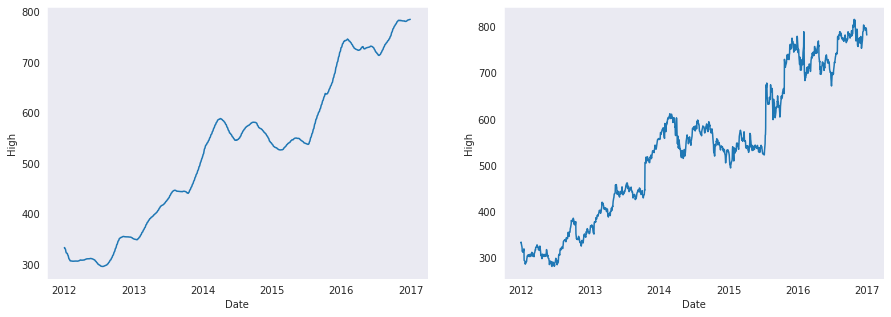

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='Date', y='High', data=rolling_60, ax=ax[0])
sns.lineplot(x='Date', y='High', data=visualizacao, ax=ax[1])
fig.show()

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


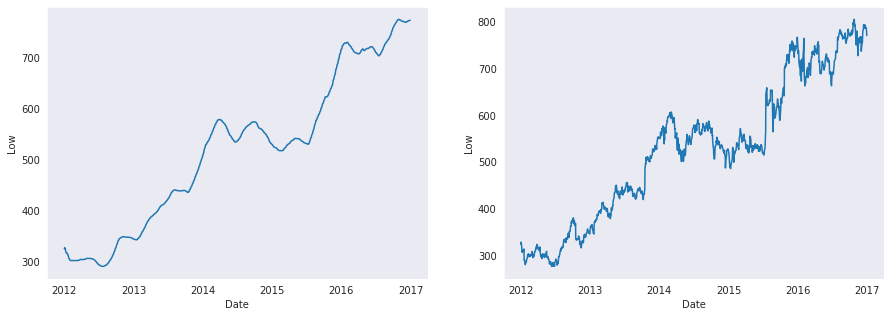

In [17]:
TO_ANALIZE = 'Low'

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='Date', y=TO_ANALIZE, data=rolling_60, ax=ax[0])
sns.lineplot(x='Date', y=TO_ANALIZE, data=visualizacao, ax=ax[1])
fig.show()

In [18]:
train_data.head()

,Date,Open,High,Low,Close,Volume,ano,mes,dia
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


In [19]:
training_set = train_data[['Close','Open']].dropna()
training_set = training_set.reset_index(drop=True)

In [20]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(training_set)

ValueError: could not convert string to float: '1,008.64'

In [21]:
features = training_set['Open']
y = training_set['Close']

In [22]:
LOOKBACK_UNITS = 60
DATA_SIZE = len(training_set)


x_train = np.array([ training_set['Open'][i-LOOKBACK_UNITS:i].values for i in range(LOOKBACK_UNITS, DATA_SIZE)])
y_train = np.array([ training_set['Open'][i-LOOKBACK_UNITS:i].values for i in range(LOOKBACK_UNITS, DATA_SIZE)])

In [23]:
regressor = Sequential()

regressor.add(
    LSTM(units = LOOKBACK_UNITS, 
         return_sequences = True, 
         input_shape = (x_train.shape[1], 1)
    )
)
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

ValueError: Error when checking input: expected lstm_input to have 3 dimensions, but got array with shape (1198, 60)

## FIM